In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

output_directory = '/home/marco/DataspellProjects/thesis/output/pca/ST001937/'

df = pd.read_csv('../../../data/archive/ST001937_AN003150.csv')
df.drop(columns=['Sample ID', 'RAW_FILE_NAME'], inplace=True)

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df['Phenotypes'] = df.applymap(lambda x: 0 if x == 'Healthy Controls' else 1 if x == 'Benign SPNS' else 2)['Phenotypes']

Filling missing values with the mean

In [2]:
df.fillna(df.mean(numeric_only=True), inplace=True)

Performing PCA to reduce the number of features and visualizing the data

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Separate features and labels
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

# Standardize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Perform PCA
num_components = 10  # You can adjust this number based on your needs
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

Explained variance by different principal components Scree plot

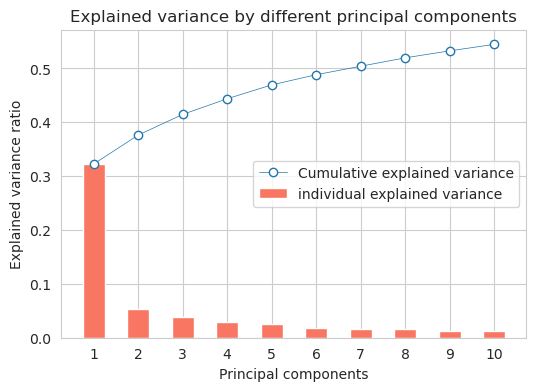

In [32]:
plt.figure(figsize=(6, 4))
plt.xticks(range(1, num_components + 1))  # Start x-axis ticks from 1
cum_var = pca.explained_variance_ratio_.cumsum()
scree_var = pca.explained_variance_ratio_
plt.plot(range(1, num_components + 1), cum_var, 
         marker='o', linestyle='-', label='Cumulative explained variance', 
         linewidth=0.5, mfc='w', color=palette[0])
plt.bar(range(1, num_components + 1), scree_var,
       label='individual explained variance', width=0.5, color=palette[1])
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance by different principal components')
plt.legend()
#saving the plot
plt.savefig(fname=output_directory + 'scree_plot.png', dpi=300)

Create a DataFrame with the PCA results


In [5]:
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, num_components + 1)])
pca_df['Phenotypes'] = y

Visualize the data

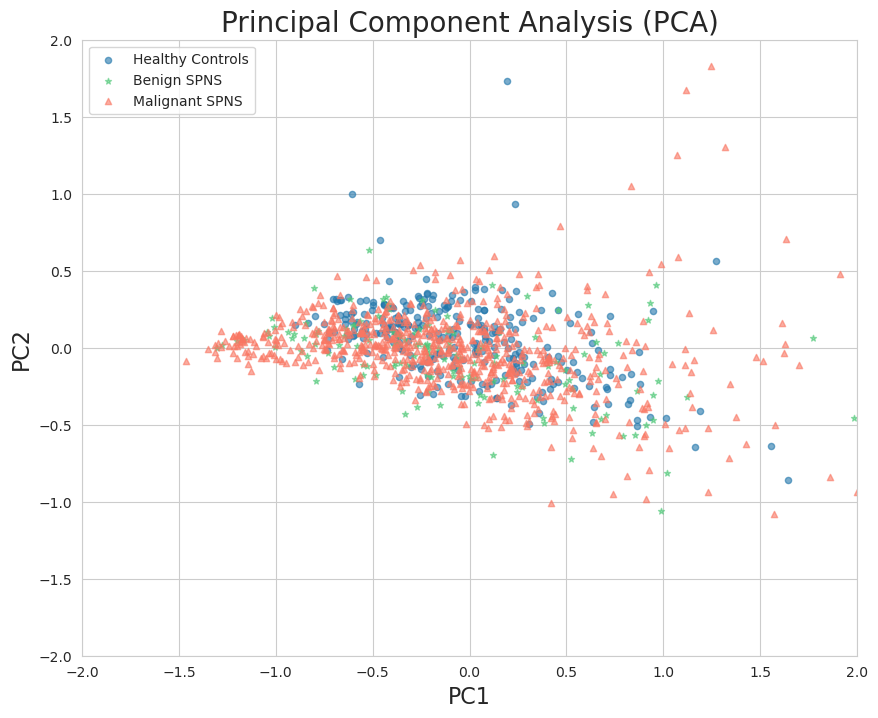

In [6]:
plt.figure(figsize=(10, 8))
labels = ['Healthy Controls', 'Benign SPNS', 'Malignant SPNS']
for i, label in enumerate(labels):
    plt.scatter(pca_df.loc[pca_df['Phenotypes'] == i, 'PC1'],  
                pca_df.loc[pca_df['Phenotypes'] == i, 'PC2'],
                label=label, alpha=0.6, s=20, marker={0: 'o', 1: '*', 2: '^'}[i], 
                color=[palette[0], palette[3], palette[1]][i])

plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.title('Principal Component Analysis (PCA)', fontsize=20)
plt.legend()
plt.savefig(fname=output_directory + '2d_plot.png', dpi=192)

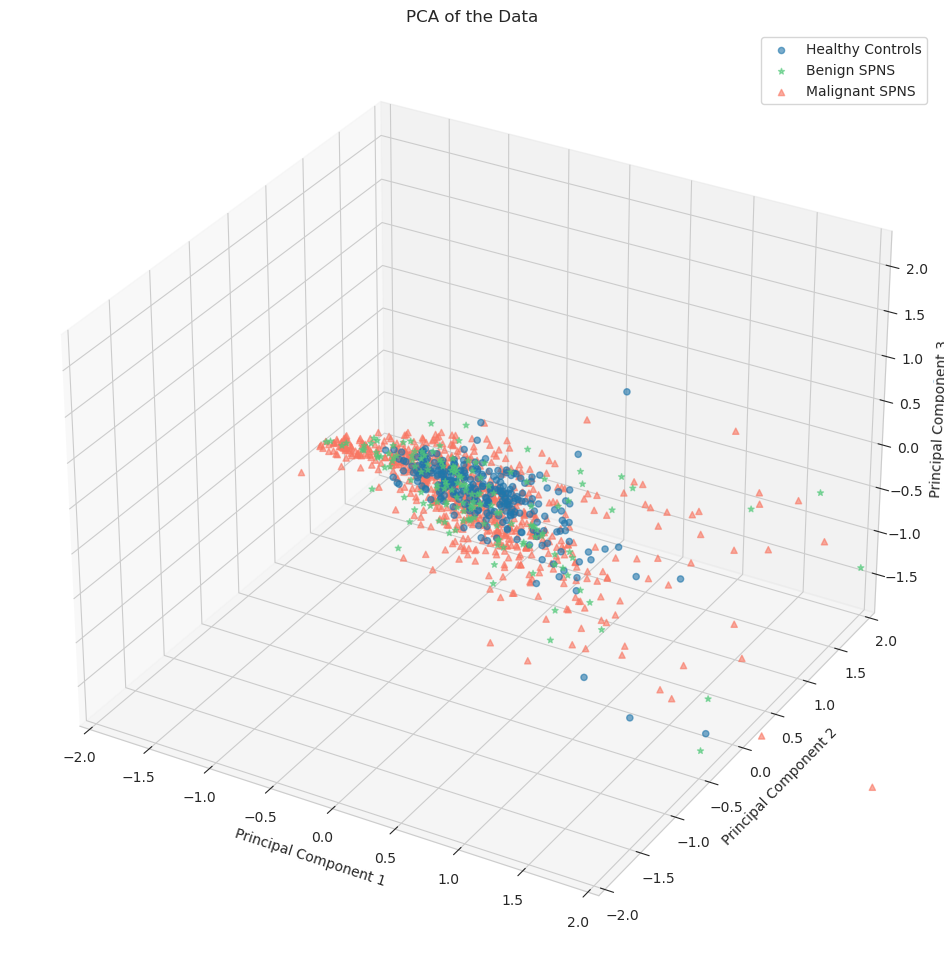

In [7]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

labels = ['Healthy Controls', 'Benign SPNS', 'Malignant SPNS']
for i, label in enumerate(labels):
    ax.scatter(pca_df.loc[pca_df['Phenotypes'] == i, 'PC1'],
               pca_df.loc[pca_df['Phenotypes'] == i, 'PC2'],
               pca_df.loc[pca_df['Phenotypes'] == i, 'PC3'],
               label=label, alpha=0.6, s=20, marker={0: 'o', 1: '*', 2: '^'}[i],
               color=[palette[0], palette[3], palette[1]][i])
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('PCA of the Data')
plt.legend()
plt.savefig(fname=output_directory + '3d_plot.png', dpi=192)

In [8]:

for angle in range(0, 360, 1):

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    labels = ['Healthy Controls', 'Benign SPNS', 'Malignant SPNS']
    for i, label in enumerate(labels):
        ax.scatter(pca_df.loc[pca_df['Phenotypes'] == i, 'PC1'],
                   pca_df.loc[pca_df['Phenotypes'] == i, 'PC2'],
                   pca_df.loc[pca_df['Phenotypes'] == i, 'PC3'],
                   label=label, alpha=0.6, s=20, marker={0: 'o', 1: '*', 2: '^'}[i],
                   #visualizing the i = 1 on top of the other
                   zorder=[2, 3, 1][i],
                   color=[palette[0], palette[3], palette[1]][i])
    
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

    plt.title('PCA of the Data')
    plt.legend()

    # Set the angle of the camera
    ax.view_init(30, angle)

    # Save it
    filename = output_directory+ 'animation/' + f'3d_plot_{angle}.png'
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)
    
#convert -delay 7 $(ls -v *.png) pca.gif
